<a href="https://colab.research.google.com/github/rushi-k12/Data_Cleaning/blob/main/clean_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/dates.txt",delimiter="\t")

In [4]:
df

,03/25/93 Total time of visit (in minutes):
0,6/18/85 Primary Care Doctor:
1,sshe plans to move as of 7/8/71 In-Home Servic...
2,7 on 9/27/75 Audit C Score Current:
3,2/6/96 sleep studyPain Treatment Pain Level (N...
4,.Per 7/06/79 Movement D/O note:
...,...
454,1979 Family Psych History: Family History of S...
455,therapist and friend died in ~2006 Parental/Ca...
456,2008 partial thyroidectomy
457,sPt describes a history of sexual abuse as a c...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 1 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   03/25/93 Total time of visit (in minutes):  459 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [6]:
df.describe()

,03/25/93 Total time of visit (in minutes):
count,459
unique,459
top,6/18/85 Primary Care Doctor:
freq,1


In [8]:
file_path = 'dates.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

In [9]:
data = []
for line in lines:
    date_match = re.search(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b', line)
    if date_match:
        date = date_match.group()
        text = line.replace(date, '').strip()  # Remove date from line and strip whitespace
        data.append([date, text])

In [10]:
df = pd.DataFrame(data, columns=['Date', 'Description'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

<ipython-input-10-aeb47173b4d9>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [13]:
df

,Date,Description,Year
0,1993-03-25,Total time of visit (in minutes):,1993
1,1985-06-18,Primary Care Doctor:,1985
2,2071-07-08,sshe plans to move as of In-Home Services: None,2071
3,1975-09-27,7 on Audit C Score Current:,1975
4,1996-02-06,sleep studyPain Treatment Pain Level (Numeric ...,1996
...,...,...,...
119,1998-12-22,CPT Code: 90801 - Psychiatric Diagnosis Interview,1998
120,1996-10-02,Age:,1996
121,1990-11-05,CPT Code: 90792: With medical services,1990
122,1977-05-04,CPT Code: 90792: With medical services,1977


<ipython-input-11-7398c62e0e82>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='Set3')


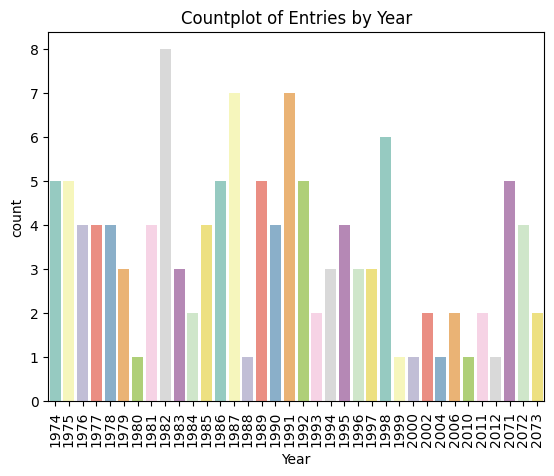

        Date                                        Description  Year
0 1993-03-25                  Total time of visit (in minutes):  1993
1 1985-06-18                               Primary Care Doctor:  1985
2 2071-07-08   sshe plans to move as of  In-Home Services: None  2071
3 1975-09-27                       7 on  Audit C Score Current:  1975
4 1996-02-06  sleep studyPain Treatment Pain Level (Numeric ...  1996


In [11]:
# Step 3: Data Analysis
# Example visualization (countplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap to see the correlations (if applicable)
# Here we assume that there are some numeric columns after further processing
# For demonstration, let's just plot the count of entries by year
df['Year'] = df['Date'].dt.year
sns.countplot(x='Year', data=df, palette='Set3')
plt.title("Countplot of Entries by Year")
plt.xticks(rotation=90)
plt.show()

# Display the cleaned DataFrame
print(df.head())